<a href="https://colab.research.google.com/github/Aakash326/ML-models/blob/main/EV_State_random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('/content/Electric Vehicle Sales by State in India.csv')

In [ ]:
df.head(10)

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
5,2014.0,jan,1/1/2014,Andhra Pradesh,CASH VAN,Others,Others,0.0
6,2014.0,jan,1/1/2014,Andhra Pradesh,CRANE MOUNTED VEHICLE,Others,Others,0.0
7,2014.0,jan,1/1/2014,Andhra Pradesh,EDUCATIONAL INSTITUTION BUS,Bus,Institution Bus,0.0
8,2014.0,jan,1/1/2014,Andhra Pradesh,EXCAVATOR (COMMERCIAL),Others,Others,0.0
9,2014.0,jan,1/1/2014,Andhra Pradesh,FORK LIFT,Others,Others,0.0


In [ ]:
df.isnull().sum()

,0
Year,0
Month_Name,0
Date,0
State,0
Vehicle_Class,0
Vehicle_Category,0
Vehicle_Type,0
EV_Sales_Quantity,0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['EV_Sales_Quantity'].fillna(df['EV_Sales_Quantity'].median(), inplace=True)

<ipython-input-6-1ac80d0ce118>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EV_Sales_Quantity'].fillna(df['EV_Sales_Quantity'].median(), inplace=True)


In [ ]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Month,Day
0,2014.0,4.0,0.0,1.0,0.0,4.0,11.0,0.0,1,1
1,2014.0,4.0,0.0,1.0,1.0,4.0,11.0,0.0,1,1
2,2014.0,4.0,0.0,1.0,2.0,4.0,11.0,0.0,1,1
3,2014.0,4.0,0.0,1.0,5.0,4.0,11.0,0.0,1,1
4,2014.0,4.0,0.0,1.0,9.0,3.0,9.0,0.0,1,1


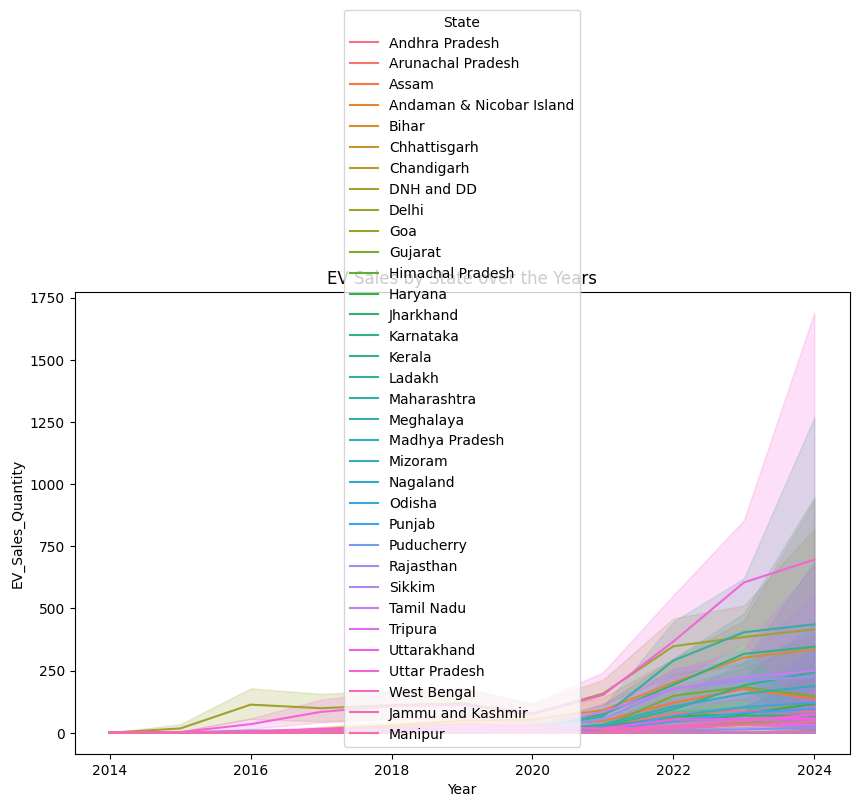

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='EV_Sales_Quantity',hue='State')
plt.title('EV Sales by State over the Years')
plt.show()

<ipython-input-11-d1d895492ae3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df,x='Vehicle_Category', y='EV_Sales_Quantity', ci=None)


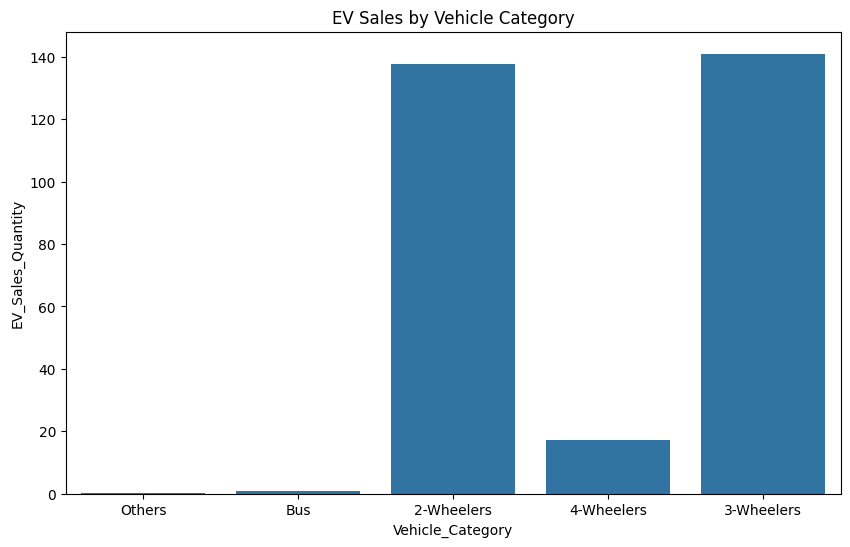

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df,x='Vehicle_Category', y='EV_Sales_Quantity', ci=None)
plt.title('EV Sales by Vehicle Category')
plt.show()

In [ ]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['Month_Name']=oe.fit_transform(df[['Month_Name']])
df['State']=oe.fit_transform(df[['State']])
df['Vehicle_Class']=oe.fit_transform(df[['Vehicle_Class']])
df['Vehicle_Category']=oe.fit_transform(df[['Vehicle_Category']])
df['Vehicle_Type']=oe.fit_transform(df[['Vehicle_Type']])
df['Date']=oe.fit_transform(df[['Date']])

In [ ]:
df['EV_Sales_Quantity'].value_counts()

,count
EV_Sales_Quantity,
0.0,82783
1.0,2481
2.0,1138
3.0,775
4.0,549
...,...
9365.0,1
1649.0,1
652.0,1


In [ ]:
df

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Month,Day
0,2014.0,4.0,0.0,1.0,0.0,4.0,11.0,0.0,1,1
1,2014.0,4.0,0.0,1.0,1.0,4.0,11.0,0.0,1,1
2,2014.0,4.0,0.0,1.0,2.0,4.0,11.0,0.0,1,1
3,2014.0,4.0,0.0,1.0,5.0,4.0,11.0,0.0,1,1
4,2014.0,4.0,0.0,1.0,9.0,3.0,9.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...
96840,2023.0,2.0,119.0,0.0,40.0,2.0,7.0,1.0,12,1
96841,2023.0,2.0,119.0,0.0,43.0,0.0,1.0,5.0,12,1
96842,2023.0,2.0,119.0,0.0,46.0,3.0,9.0,0.0,12,1
96843,2023.0,2.0,119.0,0.0,58.0,1.0,2.0,0.0,12,1


In [ ]:
x = df.drop('EV_Sales_Quantity', axis=1)
y = df['EV_Sales_Quantity']

In [ ]:
for col in x.columns:
    Q1 = x[col].quantile(0.25)
    Q3 = x[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    x[col] = np.where(x[col] < lower, lower,
                      np.where(x[col] > upper, upper, x[col]))

In [ ]:
x

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,Month,Day
0,2014.0,4.0,0.0,1.0,0.0,4.0,11.0,1.0,1.0
1,2014.0,4.0,0.0,1.0,1.0,4.0,11.0,1.0,1.0
2,2014.0,4.0,0.0,1.0,2.0,4.0,11.0,1.0,1.0
3,2014.0,4.0,0.0,1.0,5.0,4.0,11.0,1.0,1.0
4,2014.0,4.0,0.0,1.0,9.0,3.0,9.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
96840,2023.0,2.0,119.0,0.0,40.0,2.0,7.0,12.0,1.0
96841,2023.0,2.0,119.0,0.0,43.0,0.0,1.0,12.0,1.0
96842,2023.0,2.0,119.0,0.0,46.0,3.0,9.0,12.0,1.0
96843,2023.0,2.0,119.0,0.0,58.0,1.0,2.0,12.0,1.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train_norm, y_train)

RandomForestRegressor()

In [ ]:
y_pred=rf.predict(x_test_norm)

In [ ]:
print("Model Performance:")
# Import the necessary metrics from sklearn.metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")

Model Performance:
R² Score: 0.9369
MAE: 10.72
MSE: 15334.27
